# TP : Classification des chiffres manuscrits avec un Perceptron Multicouche (MLP)

## Objectif

L'objectif de ce TP est d'entraîner un réseau de neurones multicouche (MLP) pour classifier des chiffres manuscrits à l'aide de la base de données MNIST (MNIST est un dataset standard contenant des images de chiffres manuscrits (0 à 9) de 28x28 pixels.).

Nous allons suivre ces étapes :

- Chargement des données MNIST
- Prétraitement des données
- Construction du modèle MLP
- Entraînement du modèle
- Évaluation du modèle
- Prédiction et visualisation des résultats

 # Étape 1 : Chargement des données MNIST
## Qu'est-ce que MNIST ?
Le dataset MNIST contient 70 000 images de chiffres manuscrits (de 0 à 9), de 28x28 pixels en niveaux de gris.
Il est déjà inclus dans Keras, donc facile à utiliser.

## Consigne
1. Importer les bibliothèques nécessaires.
2. Charger les données MNIST.
3. Vérifier la taille des ensembles d'entraînement et de test.
4. Afficher quelques images pour comprendre les données.

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


In [4]:
# Vérification de la forme des données
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (60000, 28, 28), Test set: (10000, 28, 28)


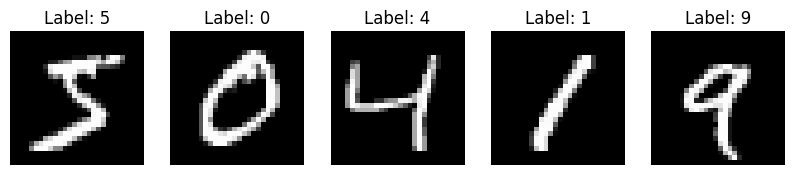

In [5]:
# Affichage de quelques images avec leurs labels
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')

plt.show()

# Étape 2 : Prétraitement des données
## Pourquoi le prétraitement est important ?
### Normalisation : 
La normalisation est une technique qui ramène les valeurs des données dans une plage plus petite (souvent entre 0 et 1 ou -1 et 1).
Ici, chaque pixel de l’image a une intensité entre 0 (noir) et 255 (blanc), donc en divisant par 255, on transforme ces valeurs en un intervalle entre 0 et 1.
--> On divise par 255.0 pour que les pixels (de 0 à 255) soient entre 0 et 1, ce qui aide le modèle à converger plus vite.
### Flattening : 
Les réseaux de neurones MLP (Multilayer Perceptron) ne peuvent traiter que des vecteurs en entrée, pas des matrices. Or, une image est une matrice (tableau 2D). --> Flattening permet de transformer l’image en un vecteur utilisable par un MLP.
--> Les images 28x28 doivent être transformées en vecteurs de 784 pixels (28×28=784) pour être utilisées dans un MLP.
### Encodage One-Hot : 
On transforme les labels 0-9 en un vecteur binaire de longueur 10 (ex: 3 → [0,0,0,1,0,0,0,0,0,0]).
## Consigne
1. Normaliser les images en divisant par 255.
2. Transformer les images 28x28 en vecteurs (flatten).
3. Convertir les labels en one-hot encoding.

In [6]:
# Normalisation des images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Transformation en vecteurs (flatten)
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Encodage One-Hot des labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Vérification de la nouvelle forme
print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Train set shape: (60000, 784), Test set shape: (10000, 784)


# Étape 3 : Création du modèle MLP
## Qu'est-ce qu'un MLP ?
Un MLP (Multilayer Perceptron) est un réseau de neurones feedforward avec :

- Une couche d’entrée (784 neurones) → chaque pixel est une entrée
- Deux couches cachées (ReLU, 128 et 64 neurones)
- Une couche de sortie (Softmax, 10 neurones) → pour classer les chiffres de 0 à 9

Fonctions d’activation :

- ReLU (Rectified Linear Unit) : utilisée dans les couches cachées pour introduire de la non-linéarité.
- Softmax : transforme les sorties en probabilités pour la classification multi-classe.
## Consigne
1. Définir un modèle séquentiel.
2. Ajouter une couche dense de 128 neurones avec ReLU.
3. Ajouter une couche dense de 64 neurones avec ReLU.
4. Ajouter une couche de sortie de 10 neurones avec Softmax.

## Compilation
la compilation du modèle en Keras permet de compiler le modèle avant l'entraînement.

## Mais pourquoi compiler un modèle ?
La compilation sert à configurer le modèle avec :

- Un optimiseur (optimizer) → pour ajuster les poids.
- Une fonction de perte (loss) → pour mesurer l'erreur du modèle.
- Une métrique d'évaluation (metrics) → pour suivre la performance.
➡ Sans compilation, le modèle ne peut pas être entraîné.

### Qu'est-ce qu'Adam ?
Adam (Adaptive Moment Estimation) est l'un des meilleurs algorithmes d'optimisation : ✅ Combine les avantages de SGD et RMSprop.
- Ajuste automatiquement le taux d’apprentissage.
- Rapide et efficace pour la convergence.

#### Autres optimisateurs possibles :
- sgd (Stochastic Gradient Descent) → Plus lent, mais efficace avec réglages.
- rmsprop (Recommandé pour les réseaux convolutifs CNN).
- adamax, nadam (Variantes avancées d'Adam).

### Qu'est-ce que categorical_crossentropy ?
- Compare les prédictions aux labels one-hot.
- Idéale pour classifier plusieurs catégories (0 à 9 pour MNIST).
- Minimise la différence entre la sortie et la vraie classe.

#### Autres fonctions de perte possibles :
- sparse_categorical_crossentropy : Utilisé quand les labels sont des entiers (0-9), sans One-Hot Encoding.
- binary_crossentropy : Pour la classification binaire (0 ou 1).
- mse (Mean Squared Error) : Utilisé pour les problèmes de régression.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définition du modèle
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Couche cachée 1
    Dense(64, activation='relu'),  # Couche cachée 2
    Dense(10, activation='softmax')  # Couche de sortie
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Affichage du résumé du modèle
model.summary()

c:\Users\cated\Documents\dev\IA school\Deep Learning\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Étape 4 : Entraînement du modèle
## Comment fonctionne l'entraînement ?
- Backpropagation : ajuste les poids du réseau pour minimiser l'erreur.
- Optimiseur Adam : règle automatiquement le taux d’apprentissage.
- Loss Categorical Crossentropy : mesure l’erreur pour une classification multi-classe.

## Qu’est-ce qu’une époque ?
Une époque (epoch) représente une passe complète sur l’ensemble des données d’entraînement.
### Exemple :
Si nous avons 60 000 images MNIST, alors une époque signifie que le modèle a vu les 60 000 images une fois.
Après 10 époques, le modèle aura vu chaque image 10 fois.
### Pourquoi 10 époques ?
- Trop peu d’époques : le modèle n’a pas assez appris.
- Trop d’époques : risque de sur-apprentissage (overfitting).
- 10 est un bon point de départ, mais on peut ajuster selon l’évolution de la perte et de la précision.
### Comment savoir combien d’époques utiliser ?
- On peut suivre la courbe d'entraînement et arrêter si la précision n’augmente plus.
- On peut utiliser EarlyStopping pour arrêter automatiquement quand la performance stagne.
## Qu’est-ce qu’un batch size ?
Le batch size définit combien d'exemples seront traités à la fois avant la mise à jour des poids du modèle.
### Exemple :
Si on a 60 000 images MNIST et un batch size de 32 :
- On divise le dataset en mini-lots (mini-batches) de 32 images.
- Après chaque mini-batch, le modèle met à jour ses poids.
- Une époque aura 60 000 / 32 = 1875 mises à jour.
### Pourquoi 32 ?
- 32 est un bon compromis entre vitesse et précision.
- Petits batchs (ex: 8) → plus précis mais lent (plus de mises à jour).
- Grands batchs (ex: 512) → plus rapide mais moins précis.
--> Sur GPU, les puissances de 2 (16, 32, 64...) sont optimisées.
## Pourquoi un ensemble de validation ?
L’ensemble de validation permet de :
- Évaluer le modèle après chaque époque, sans toucher aux données de test.
- Surveiller l'overfitting (si la perte augmente sur validation mais diminue sur entraînement).
- Ajuster les hyperparamètres comme le batch_size, le nombre d’époques, etc.
##  Consigne
1. Entraîner le modèle sur 10 époques.
2. Utiliser un batch size de 32.
3. Ajouter un ensemble de validation.

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8749 - loss: 0.4207 - val_accuracy: 0.9640 - val_loss: 0.1178
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9675 - loss: 0.1041 - val_accuracy: 0.9735 - val_loss: 0.0840
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9783 - loss: 0.0691 - val_accuracy: 0.9747 - val_loss: 0.0846
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9843 - loss: 0.0497 - val_accuracy: 0.9780 - val_loss: 0.0719
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9870 - loss: 0.0384 - val_accuracy: 0.9749 - val_loss: 0.0823
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9903 - loss: 0.0309 - val_accuracy: 0.9752 - val_loss: 0.0850
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9921 - loss: 0.0252 - val_accuracy: 0.9761 - val_loss: 0.0843
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9928 - loss: 0.0

# Étape 5 : Évaluation et Analyse des résultats
## Pourquoi évaluer le modèle ?
L'évaluation permet de voir si le modèle généralise bien sur de nouvelles données.
## Consigne
1. Évaluer la précision sur les données de test.
2. Tracer les courbes d'apprentissage.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9767 - loss: 0.1112
Test accuracy: 0.9795


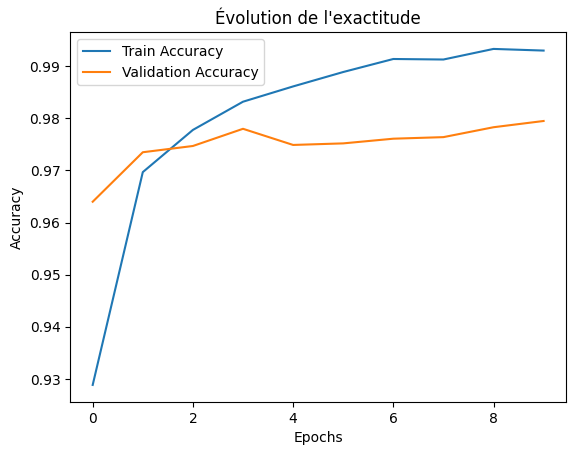

In [9]:
# Évaluation du modèle
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Tracer la courbe d'apprentissage
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Évolution de l'exactitude")
plt.show()


# Signes possibles d'overfitting
## Définition de l'overfitting :
L’overfitting (sur-apprentissage) se produit lorsque le modèle s’adapte trop bien aux données d'entraînement et ne généralise pas bien aux nouvelles données.
## Indices observés :
- L'accuracy sur l’entraînement continue d'augmenter, alors que celle de la validation stagne et fluctue légèrement.
- L'accuracy sur l'entraînement est proche de 99%, tandis que celle sur la validation est environ 97%.
## Pourquoi est-ce un problème ?
Si l'overfitting devient trop important, le modèle pourrait mémoriser les données d'entraînement au lieu d'apprendre les vraies relations entre les chiffres, ce qui réduirait ses performances sur de nouvelles images.

# Étape 6 : Prédiction et Visualisation
## Tester le modèle sur des nouvelles images
Nous allons afficher quelques images de l’ensemble de test avec leurs prédictions.
## Consigne
1. Sélectionner quelques images de test.
2. Afficher leur prédiction par le modèle.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


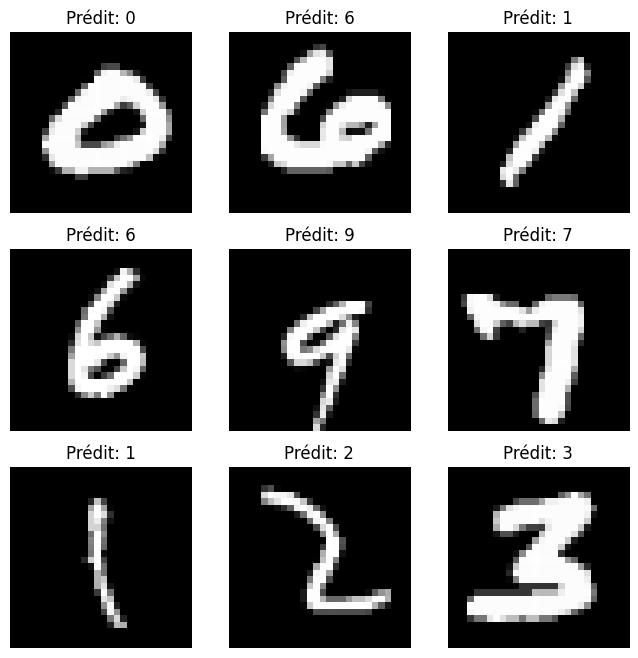

In [10]:
# Prédiction
predictions = model.predict(X_test)

# Affichage de quelques images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(9):
    index = np.random.randint(0, len(X_test))
    axes[i].imshow(X_test[index].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Prédit: {np.argmax(predictions[index])}")
    axes[i].axis('off')

plt.show()

# Amélioration du modèle 
1. Ajouter de la régularisation
   1.1. Ajout de Dropout pour éviter l'overfitting :
   1.2. Augmenter la régularisation L2 dans Dense() :
2. Utiliser l'early stopping
3. Augmenter les données (Data Augmentation)
# Travail à faire:
Expérimenter avec :
1. Modèle Basique (MLP simple, peu de neurones)
2. Modèle Profond (Plus de couches cachées)
3. Modèle avec Régularisation (Dropout, L2)
4. Modèle avec une autre fonction d'activation (Leaky ReLU au lieu de ReLU)

In [11]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [12]:
def create_model(architecture="basic"):
    model = Sequential()
    
    if architecture == "basic":
        # Modèle simple
        model.add(Dense(64, activation='relu', input_shape=(784,)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(10, activation='softmax'))
    
    elif architecture == "deep":
        # Modèle profond
        model.add(Dense(256, activation='relu', input_shape=(784,)))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(10, activation='softmax'))
    
    elif architecture == "regularized":
        # Modèle avec Dropout et L2
        model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(784,)))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
        model.add(Dropout(0.3))
        model.add(Dense(10, activation='softmax'))
    
    elif architecture == "leaky_relu":
        # Modèle avec Leaky ReLU
        from tensorflow.keras.layers import LeakyReLU
        model.add(Dense(128, input_shape=(784,)))
        model.add(LeakyReLU(alpha=0.1))
        model.add(Dense(64))
        model.add(LeakyReLU(alpha=0.1))
        model.add(Dense(10, activation='softmax'))

    # Compilation du modèle
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [13]:
architectures = ["basic", "deep", "regularized", "leaky_relu"]
histories = {}

for arch in architectures:
    print(f"🔹 Entraînement du modèle : {arch}")
    model = create_model(arch)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    # Stocker les résultats
    histories[arch] = history

    # Évaluer le modèle
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"✅ Test Accuracy du modèle {arch}: {test_acc:.4f}\n")

🔹 Entraînement du modèle : basic
✅ Test Accuracy du modèle basic: 0.9719

🔹 Entraînement du modèle : deep
✅ Test Accuracy du modèle deep: 0.9764

🔹 Entraînement du modèle : regularized
✅ Test Accuracy du modèle regularized: 0.9697

🔹 Entraînement du modèle : leaky_relu


c:\Users\cated\Documents\dev\IA school\Deep Learning\env\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


✅ Test Accuracy du modèle leaky_relu: 0.9791



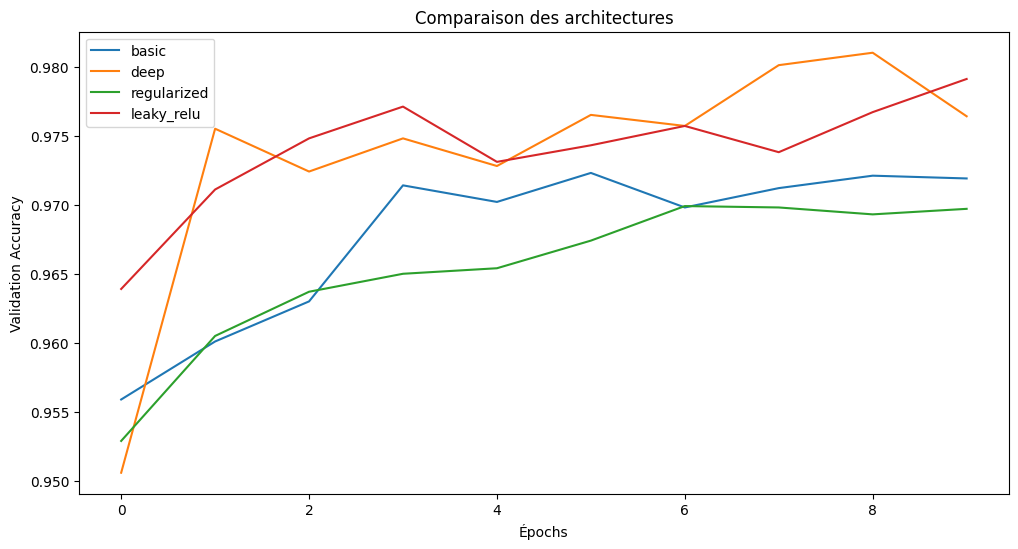

In [14]:
plt.figure(figsize=(12, 6))

for arch in architectures:
    plt.plot(histories[arch].history['val_accuracy'], label=f"{arch}")

plt.xlabel("Épochs")
plt.ylabel("Validation Accuracy")
plt.title("Comparaison des architectures")
plt.legend()
plt.show()

# Un Réseau de Neurones Convolutif (CNN)
Un CNN (Convolutional Neural Network) est une architecture de réseau de neurones conçue spécifiquement pour traiter les images. Contrairement aux MLP, qui nécessitent un Flattening de l’image, un CNN préserve la structure spatiale et détecte automatiquement des motifs dans les images.
## Pourquoi utiliser un CNN au lieu d’un MLP ?
### Problème avec les MLP (Multilayer Perceptron) :
- Un MLP traite chaque pixel indépendamment, ce qui ne tient pas compte de la structure spatiale de l’image.
- Le nombre de paramètres devient énorme si on utilise des images de haute résolution.
### Avantages des CNN :
- Exploite la structure spatiale des images (prend en compte les relations entre pixels voisins).
- Moins de paramètres qu’un MLP classique, car il utilise des filtres convolutifs.
- Excellente capacité de généralisation pour la classification d’images.
## Architecture typique d’un CNN
Un CNN est composé de plusieurs types de couches :
- Convolution (Conv2D)	Détecte des caractéristiques locales avec des filtres (ex: bords, textures).
- Activation (ReLU)	Introduit de la non-linéarité (évite le problème de vanishing gradient).
- Pooling (MaxPooling2D)	Réduit la taille des images tout en conservant les informations importantes.
- Flatten	Transforme la sortie convolutive en vecteur pour être utilisé par la couche dense.
- Dense (Fully Connected Layer)	Effectue la classification finale en sortie.
## Illustration du fonctionnement d’un CNN
- Conv2D (Filtrage) : Extraction des bords et textures.
- MaxPooling2D (Réduction) : Réduit la taille tout en conservant l’essentiel.
- Conv2D + MaxPooling2D (Empilage de couches) : Apprend des motifs plus complexes.
- Flatten : Transforme la sortie en vecteur pour classification.
- Dense (Fully Connected) : Associe les caractéristiques aux 10 classes.

In [15]:
# Reshape pour avoir un format compatible avec Conv2D (28x28x1 pour noir & blanc)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

### Définir l’architecture CNN

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
#créer un CNN avec 2 couches de convolution et du MaxPooling pour réduire la taille de l’image progressivement
# Définition du modèle CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # 32 filtres 3x3
    MaxPooling2D(pool_size=(2,2)),  # Réduction de moitié
    Conv2D(64, (3,3), activation='relu'),  # 64 filtres
    MaxPooling2D(pool_size=(2,2)),  
    Flatten(),  # Passage en vecteur
    Dense(128, activation='relu'),  # Couche dense classique
    Dropout(0.3),  # Régularisation pour éviter l'overfitting
    Dense(10, activation='softmax')  # Couche de sortie pour classification
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Affichage du résumé du modèle
model.summary()

c:\Users\cated\Documents\dev\IA school\Deep Learning\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Entraînement du CNN
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.4770 - loss: 1.4673 - val_accuracy: 0.9120 - val_loss: 0.3003
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8858 - loss: 0.3701 - val_accuracy: 0.9416 - val_loss: 0.1937
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9204 - loss: 0.2623 - val_accuracy: 0.9548 - val_loss: 0.1500
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9373 - loss: 0.2102 - val_accuracy: 0.9630 - val_loss: 0.1148
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9442 - loss: 0.1823 - val_accuracy: 0.9666 - val_loss: 0.1060
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9516 - loss: 0.1595 - val_accuracy: 0.9705 - val_loss: 0.0942
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9560 - loss: 0.1453 - val_accuracy: 0.9727 - val_loss: 0.0851
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9600 -

In [18]:
# Évaluation sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9777


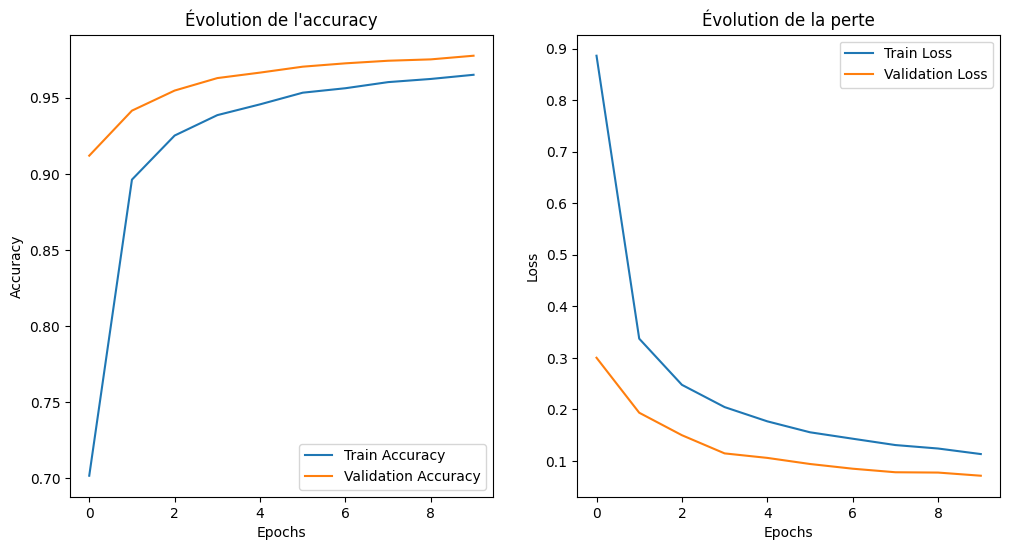

In [19]:
plt.figure(figsize=(12, 6))

# Courbe d'accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Évolution de l\'accuracy')
plt.legend()

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Évolution de la perte')
plt.legend()

plt.show()